In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats as stats


In [33]:
data=pd.read_csv("Finance.csv")

In [34]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [35]:
data.shape

(45211, 17)

# Check for column names 

In [36]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Check the Data Types

In [37]:
data.dtypes
    

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

# Check for Null Values

In [38]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Check for Data Quality Issues 

In [39]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [40]:
data['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

# Using Chi-Square to test Assiciation between Categorical attributes 

The class variable is Y which is object type. So we can use Chi Square to check the association between 
all other object types and the class.The variables having strong association can be chosen as the features 
for machine learning algorithm.

lets do it for default feature

In [41]:
data['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [42]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [43]:
ov=pd.crosstab(data['default'],data['y'])

In [44]:
ov

y,no,yes
default,,
no,39159,5237
yes,763,52


In [45]:
import scipy.stats as s

In [46]:
b=s.chi2_contingency(ov)

In [47]:
b


(22.20224995571685,
 2.4538606753508344e-06,
 1,
 array([[39202.34261574,  5193.65738426],
        [  719.65738426,    95.34261574]]))

b is a tuple containing an immutable sequence of python objects . Here it contains four objcets . 
b[0] contains the value of chi2 statistic , b[1] contains the p-value of the test , b[2] contains the 
degree of freedom and b[3] contains the expected frequencies.

In [48]:
b[0]

22.20224995571685

In [49]:
b[1] 

2.4538606753508344e-06

In [50]:
b[2]

1

In [51]:
b[3]

array([[39202.34261574,  5193.65738426],
       [  719.65738426,    95.34261574]])

In [52]:

def test_dependency(data,f1,f2,alpha):
    ov=pd.crosstab(data[f1],data[f2])
    b=s.chi2_contingency(ov)
    chi2_statistic=b[0]
    p_value=b[1]
    dof=b[2]
    critical_value=s.chi2.ppf(q=1-alpha, df=dof)
    print('Significance level: ',alpha)
    print('Degree of Freedom: ',dof)
    print('chi-square statistic:',chi2_statistic)
    print('critical_value:',critical_value)
    print('p-value:',p_value)
    
    if chi2_statistic>=critical_value:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    if p_value<=alpha:
        print("Reject H0,There is a relationship between 2 categorical variables")
    else:
        print("Retain H0,There is no relationship between 2 categorical variables")
    
    


In [53]:
test_dependency(data,'default','y',0.05)

Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 22.20224995571685
critical_value: 3.841458820694124
p-value: 2.4538606753508344e-06
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [54]:
test_dependency(data,'education','y',0.05)

Significance level:  0.05
Degree of Freedom:  3
chi-square statistic: 238.92350616407606
critical_value: 7.814727903251179
p-value: 1.6266562124072994e-51
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


# Plotting Stacked Bar Chart of categorical variables 

In [55]:
ov=pd.crosstab(data['default'],data['y'])

<AxesSubplot:xlabel='default'>

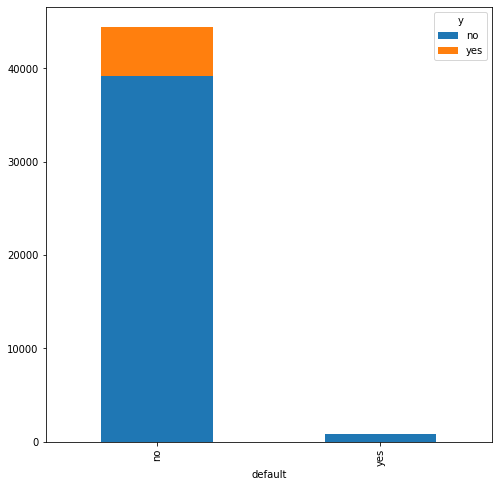

In [56]:
ov.plot(kind='bar', figsize=(8,8),stacked=True)

In [57]:
ov=pd.crosstab(data['education'],data['y'])

<AxesSubplot:xlabel='education'>

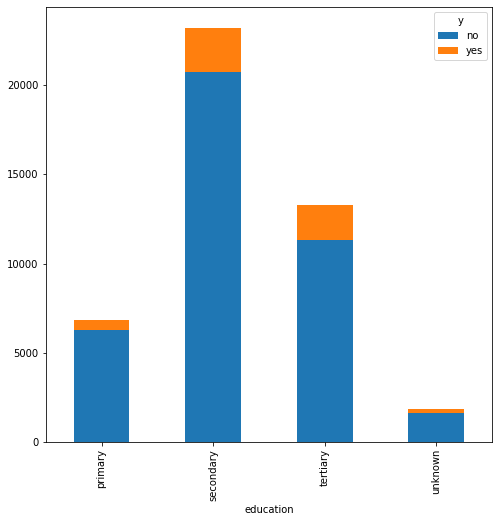

In [58]:
ov.plot(kind='bar', figsize=(8,8),stacked=True)

# Computing Correlation Coefficient : Numerical vs Numerical Attributes

In [59]:
df=data.copy()

In [60]:
data['y'].dtype

dtype('O')

In [61]:
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

we can convert yes and no into 1 and 0 and change the data type from object to integer 

In [63]:
data['y']=data['y'].apply(lambda x:0 if x=='no' else 1)

In [160]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [161]:
data['y'].dtype

dtype('int64')

In [162]:
cor_matrix=data.corr()

In [163]:
print(cor_matrix['y'].sort_values(ascending=False))

y           1.000000
duration    0.394521
pdays       0.103621
previous    0.093236
balance     0.052838
age         0.025155
day        -0.028348
campaign   -0.073172
Name: y, dtype: float64


In [164]:
cor_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


In [165]:
cor_matrix.style.background_gradient(cmap='BrBG')

,age,balance,day,duration,campaign,pdays,previous,y
age,1,0.0977827,-0.00912005,-0.00464843,0.00476031,-0.023758,0.00128832,0.025155
balance,0.0977827,1,0.00450259,0.0215604,-0.0145783,0.00343532,0.0166736,0.0528384
day,-0.00912005,0.00450259,1,-0.0302063,0.16249,-0.0930441,-0.0517105,-0.0283478
duration,-0.00464843,0.0215604,-0.0302063,1,-0.0845695,-0.00156477,0.00120306,0.394521
campaign,0.00476031,-0.0145783,0.16249,-0.0845695,1,-0.0886277,-0.0328553,-0.073172
pdays,-0.023758,0.00343532,-0.0930441,-0.00156477,-0.0886277,1,0.45482,0.103621
previous,0.00128832,0.0166736,-0.0517105,0.00120306,-0.0328553,0.45482,1,0.0932358
y,0.025155,0.0528384,-0.0283478,0.394521,-0.073172,0.103621,0.0932358,1


https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

# Feature selection Using One-way ANOVA ( Categorical (Feature) vs Continious Class )

In [64]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [65]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [66]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [67]:
ov=pd.crosstab(data['education'],data['y'])

In [68]:
ov

y,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1605,252


<AxesSubplot:xlabel='education'>

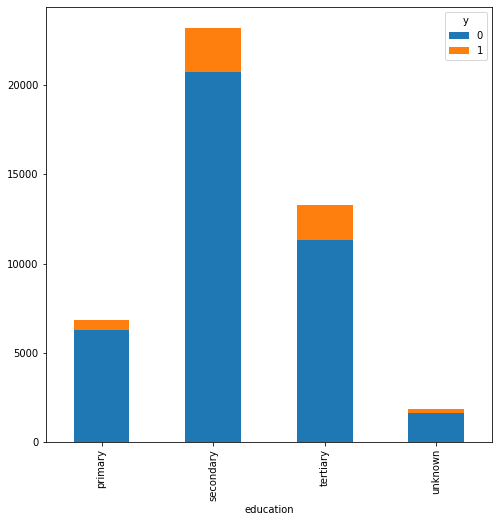

In [69]:
ov.plot(kind='bar', figsize=(8,8),stacked=True)

In [71]:
edu_frame=data[['education', 'y']]
edu_frame.head()

,education,y
0,tertiary,0
1,secondary,0
2,secondary,0
3,unknown,0
4,unknown,0


In [74]:
groups = edu_frame.groupby("education").groups

In [76]:
edu_class=edu_frame['y']

In [87]:
primary = edu_class[groups["primary"]]
secondary = edu_class[groups["secondary"]]
tertiary = edu_class[groups["tertiary"]]
unknown = edu_class[groups["unknown"]]

In [88]:
primary=primary.values
secondary=secondary.values
tertiary=tertiary.values
unknown=unknown.values

In [92]:
unknown

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
dfd=len(primary)-1+len(secondary)-1+len(tertiary)-1+len(unknown)-1
dfd

45207

In [93]:
# Perform the ANOVA

stats.f_oneway(primary,secondary,tertiary ,unknown )

F_onewayResult(statistic=80.05719537722354, pvalue=1.1975792884174679e-51)

In [94]:
#Calculate Criticl Value 

In [95]:
 import scipy.stats
scipy.stats.f.ppf(q=1-0.05, dfn=3, dfd=45207)

2.6051056485564086

Sicnce calculated F values (80.05) > critical value ( 2.60) , we can reject null hypothesies and conclude that 
atleast one group is different  and the feature is releavant to the class.

Another way 

# Feature Selection Using Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Credit Card Dataset

In [214]:
data=pd.read_csv("UCI_Credit_Card.csv")

In [215]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [216]:
data.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

In [218]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [221]:
len(data)

30000

In [220]:
train,test = train_test_split(data)

In [223]:
len(train)


22500

In [224]:
len(test)

7500

In [226]:
.75*len(data)

22500.0

In [228]:
X_train = train.drop(['ID','default.payment.next.month'],axis=1)

In [229]:
Y_train = train['default.payment.next.month']

In [101]:
clf=RandomForestClassifier(n_estimators=100, criterion='entropy', 
                           max_depth=None, min_samples_split=10, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto',
                           max_leaf_nodes=None, min_impurity_decrease=0.0, 
                           min_impurity_split=None, bootstrap=True, oob_score=False,
                           n_jobs=None, random_state=None, verbose=0, 
                           warm_start=False, class_weight=None, 
                           ccp_alpha=0.0, max_samples=None)

In [231]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [235]:
importances = clf.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, list(X_train)), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.09029994700349722, 'PAY_0'), (0.06621086444237785, 'AGE'), (0.06112906374692433, 'BILL_AMT1'), (0.06043628838223402, 'LIMIT_BAL'), (0.05443449422047112, 'BILL_AMT2'), (0.05179603472655183, 'BILL_AMT3'), (0.05108638186492492, 'BILL_AMT6'), (0.051043156697383234, 'PAY_AMT1'), (0.050020495436598617, 'BILL_AMT4'), (0.049637598048190776, 'BILL_AMT5'), (0.04745583846504473, 'PAY_AMT2'), (0.046429105712246004, 'PAY_AMT6'), (0.04603645446670786, 'PAY_2'), (0.04502162485210847, 'PAY_AMT3'), (0.04324386204049775, 'PAY_AMT4'), (0.04290002060423927, 'PAY_AMT5'), (0.03143328658356657, 'PAY_3'), (0.022678901842924443, 'PAY_4'), (0.022352187276683623, 'PAY_5'), (0.020133244649267273, 'EDUCATION'), (0.020064208744938104, 'PAY_6'), (0.014001924405403416, 'MARRIAGE'), (0.012155015787218521, 'SEX')]


In [237]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

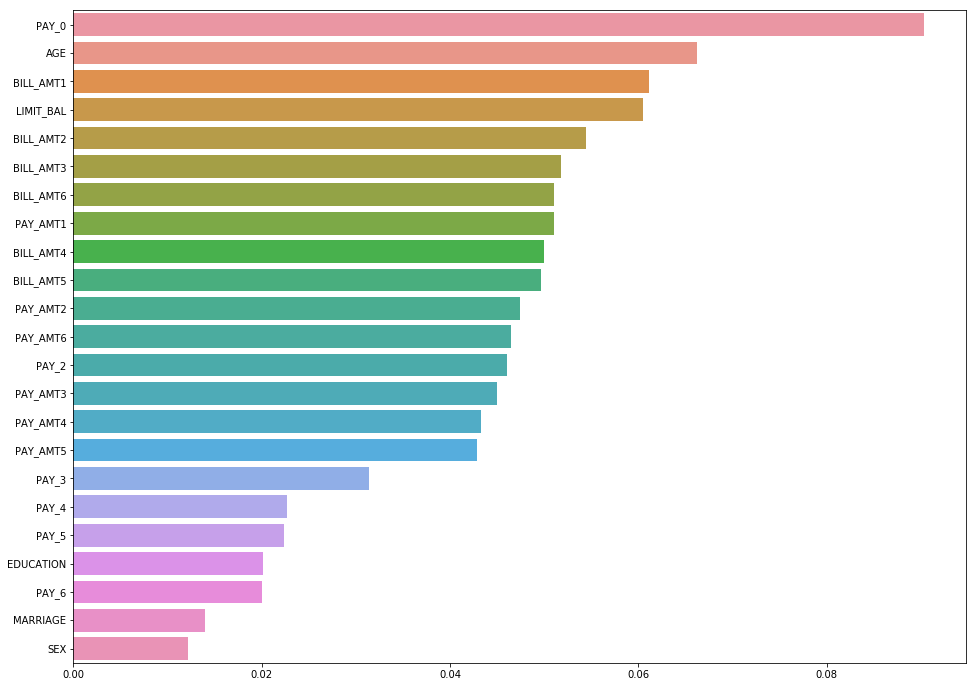

In [240]:
# Creating a bar plot
plt.figure(figsize=(16,12))
sns.barplot(x=feature_imp, y=feature_imp.index)

In [244]:
data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


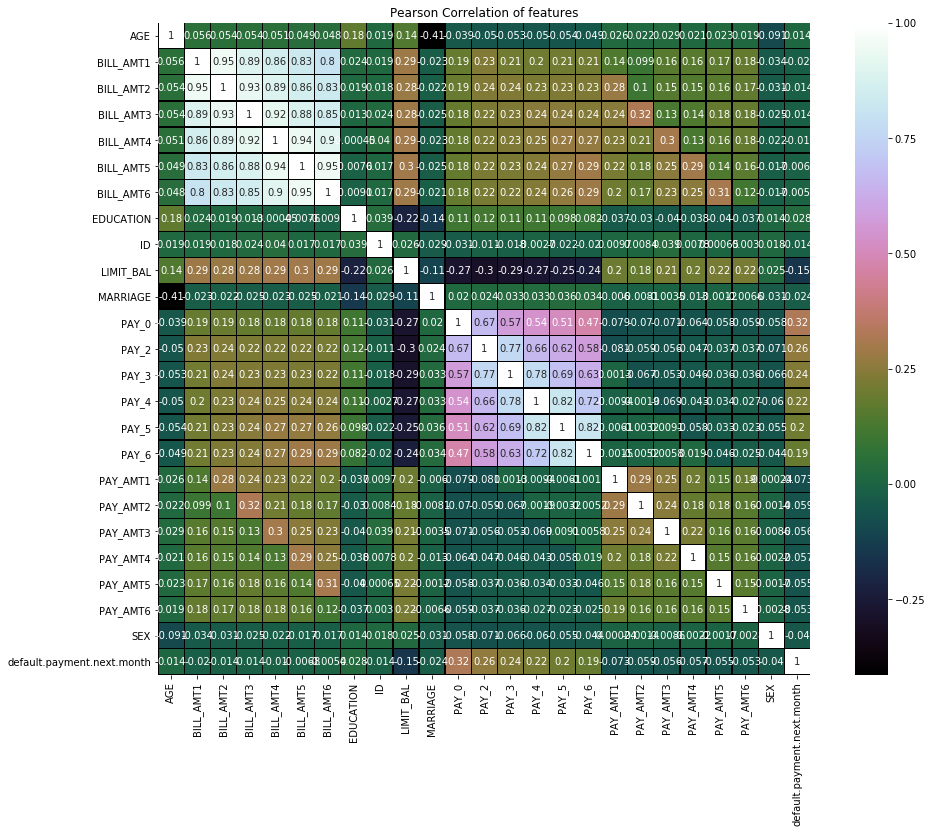

In [242]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = data[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)